## 타이타닉 데이터 EDA
- 학습 목표 : 시각화, 기초 통계량 등, 데이터에 대한 EDA를 통해 설득력 높은 가설 수립하기
- 학습 데이터 출처 : https://www.kaggle.com/competitions/titanic/data
  - train : 학습 데이터
  - test : 훈련 데이터
  - gender-submission : 승객 번호별 성별

### Stage1 데이터 불러오기, 전처리
- colab 환경에서 어떻게 불러올지
- 컬럼 처리 어떻게 할지
- 결측치 등은 어떻게 처리할지
- 컬럼별 정보 등은 어떻게 해석할지 등 간단히 점검

In [1]:
## 폴더 경로 확인하기

import os # 경로 확인!
os.getcwd() # 현재 작업경로 '/content'


'/content'

#### 폴더 경로 이미지(예시)
- 이미지 삽입 방법(Tip, Github에 업로드 한 이미지)
 - github.com을 'raw.githubusercontent.com'로
 - blob삭제

<img src = "https://raw.githubusercontent.com/yj-start-2025/DS4_by_modulabs/main/Module_05%20Machine%20Learing/01%20working_space_image(titanic).png" width="500">

In [2]:
os.listdir('/content')
#  from google.colab import files
#  uploaded = files.upload()
#  아래 코드 블럭에서 업데이트 한 경우에... 파일이 불러지게 됨!

['.config',
 'gender_submission (1).csv',
 'test.csv',
 'train (1).csv',
 'train.csv',
 'test (1).csv',
 'gender_submission.csv',
 'sample_data']

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# Google drive for desktop 과 colab 간의 mount시 충돌 문제...
string = """
1) 해결책1: 로컬환경 vs-code, anaconda 등으로 작업을 한다.
2) 해결책2: google계정을 별도로 만든다(LLM등 기타 분석 작업 전용의 계정)
  - 문제점1 : velog, github, 기존 google 계정으로 연동해 둠
  - 문제점2 : 신규계정 만들었을 때 drive.mount가 될지 장담 못함?
3) 해결책3: 일단 현재 과제에 대해서, local에서 파일을 올린다.
"""
print(string)


1) 해결책1: 로컬환경 vs-code, anaconda 등으로 작업을 한다.
2) 해결책2: google계정을 별도로 만든다(LLM등 기타 분석 작업 전용의 계정)
  - 문제점1 : velog, github, 기존 google 계정으로 연동해 둠
  - 문제점2 : 신규계정 만들었을 때 drive.mount가 될지 장담 못함? 
3) 해결책3: 일단 현재 과제에 대해서, local에서 파일을 올린다.



#### 로컬 파일 올리서 작업
- vs.code, anaconda 등으로 작업할 수 있으나..일단 로컬 파일 올려서 작업
- (Problem): 환경 설정에 대한 문제는 흥미롭지만 여기 매몰되지 말 것
  - 결국 오전 시간 다 날림(google에서 drive mount하는 건 중요한게 아님에도 불구하고)
  - 차라리 kagglehub 통해 데이터 로드하는 등의, 탬플릿을 작성해 두는 것이 나을 듯!
- (Try) : 나중에 로컬에서 vscode, anaconda 꼬인 부분 해결해 둘 것!

In [4]:
 from google.colab import files
 uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [5]:
# 업로드 완료 되면 현재 세션에 자동 저장됨!

import pandas as pd

train = pd.read_csv('train.csv') # 훈련 데이터
test = pd.read_csv('test.csv') # 학습 데이터
gender_submission = pd.read_csv('gender_submission.csv') # 성별 제출값 대한 코드값

In [6]:
train.shape[0]

891

In [7]:
# 각 데이터 크기 확인

print(f'훈련데이터 : {train.shape[0]}행, {train.shape[1]}열')
print(f'테스트데이터 : {test.shape[0]}행, {test.shape[1]}열')
print(f'성별제출값 : {gender_submission.shape[0]}행, {gender_submission.shape[1]}열')

훈련데이터 : 891행, 12열
테스트데이터 : 418행, 11열
성별제출값 : 418행, 2열


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### train이 컬럼이 더 많네?
- 차지합으로 확인
- set함수 활용!
  - 확인해보니...... 'Survived'컬럼이 다르네!
  - 근데... 저자가 무슨 기준으로 train/test 나눈지 모르기 때문에, train/test도 명시해 줄 필요가 있음.
  - test data와 gender_submission data를 병합해서 test2를 정의해보자!

In [10]:
gender_submission.head() # PassengerId key값으로 merge하면 될듯!

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
set(train.columns) - set(test.columns)

{'Survived'}

In [12]:
test2 = test.merge(gender_submission, how='left', on='PassengerId') # 418, 12(12열 되는거 체크!)

In [13]:
#### 저자의 train/test 기준을 모르니 명시해 두자

train.columns, test2.columns # 둘이 컬럼 순서가 다르다는 거 일단 체크! (train기준으로 통일)

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
       dtype='object'))

In [14]:
test2 = test2[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']] # for문 쓰는게 맞는게 몇 개 안되어서 복사함

In [15]:
train.columns, test2.columns # 순서 맞춰진 것 확인!

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [16]:
# train/test 구분위해 임의의 컬럼 'marker'정의

train['marker'] = 'train'
test2['marker'] = 'test'

In [17]:
# 두 데이터 pd.concat으로 결합

fullDt = pd.concat([train, test2]) # axis=0 해야 위 아래 결합

In [18]:
fullDt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,marker
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [20]:
fullDt.shape # 전체 1309 cases

(1309, 13)

In [26]:
# 결측치 체크!
fullDt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  marker       1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


### Stage2 : EDA 시작하기
- 각 feature 별로 생존(1)/사망(0) 여부 체크
- Pclass : 티켓등급(몇 등석인지..)
- Sex : 성별
- Age : 나이
- SibSp : 타이타닉에 승선한 형제자매 수(number of siblings)
- Parch : # of parents / children aboard the Titanic
- Ticket :Ticket number (당장 필요 없을 듯?)
- fare: 요금 (pclass랑 연관있나?)
- cabin : cabin 넘버 (선실 번호)
- embarked : Port of Embarkation 탑승한 항구
  - C = Cherbourg, Q = Queenstown, S = Southampton

In [40]:
# 일단 전체 생존률 check!
survive_ratio = fullDt['Survived'].sum()/len(fullDt)
survive_ratio_train = train['Survived'].sum()/len(train)
survive_ratio_test = test2['Survived'].sum()/len(test2)
print(f'전체 모집단 생존률: {round(survive_ratio*100,3)}.2f%')
print(f'training_data 내 생존률: {round(survive_ratio_train*100,3)}.2f%')
print(f'test_data 내 생존률: {round(survive_ratio_test*100,3)}.2f%') # train/test 데이터 큰 무리없이 분할 된 듯?!

전체 모집단 생존률: 37.739.2f%
training_data 내 생존률: 38.384.2f%
test_data 내 생존률: 36.364.2f%


In [49]:
import numpy as np

min = fullDt['Fare'].min()
max = fullDt['Fare'].max()
median = fullDt['Fare'].median()
average = fullDt['Fare'].mean()
skewness = fullDt['Fare'].skew() # 왜도(기울어짐 계산) / 아마 통계시간에 잠시 언급된 내용일듯?!

print(f'최소값: {min}')
print(f'최대값: {max}')
print(f'중앙값: {median}')
print(f'평균값: {average}')
print(f'왜도(Skewness): {skewness:.4f}') # 왜도 (어느쪽으로 치우쳤는지)

# 통계적 해석
if skewness > 0 :
  comment = """오른쪽 꼬리가 긴 분포(right-skewed),
  부자가 국가 GDP 평균치 확 끌어올리는 경우!
  """
elif skewness < 0 :
  comment = """왼쪽 꼬리가 긴 분포(left-skewed),
  시험이 정말 쉬웠는데 소수만 실수한 경우!
  """

else:
  comment = """
  대칭 분포(skewness=0), 가장 대표적인 대칭 분포의
  예시로 정규분포를 들 수 있음!
  """

print(comment)

# string = """중앙값이 평균값보다 훨씬 낮다는 것은, 국가의 GDP 분포처럼
# 오른쪽 꼬리로 치우쳐 있음을 의미한다! 다시 말해서 티켓값이 비싼 사람들 소수가
# 티켓값 평균을 크게 끌어올렸다고 이해할 수 있다.
# """

# print(string)

최소값: 0.0
최대값: 512.3292
중앙값: 14.4542
평균값: 33.29547928134557
왜도(Skewness): 4.3677
오른쪽 꼬리가 긴 분포(right-skewed),
  부자가 국가 GDP 평균치 확 끌어올리는 경우!
  


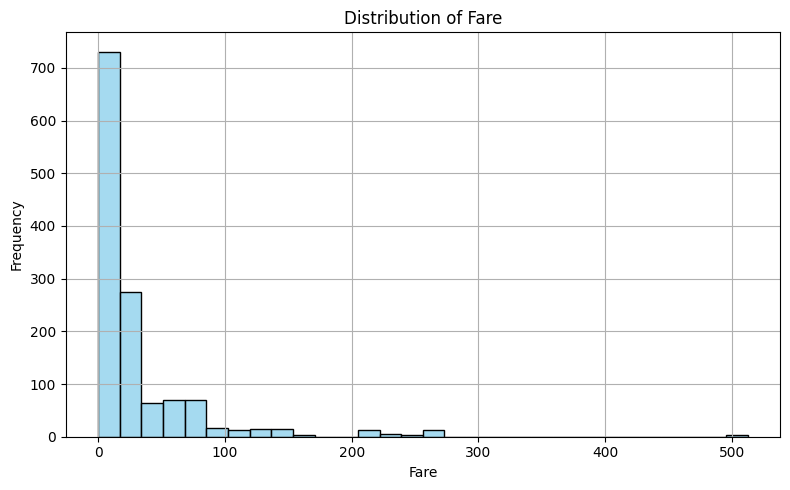

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(fullDt['Fare'], bins=30, color='skyblue')

plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Fare(요금) : boxplot(상자그림)
- 그래서 사망자(0)vs생존자(1) 간의 상자그림 그려볼 필요도..
- 근데 극단치 분포 보니 의미 없을지도..
- 근데... boxplot 잘 안그려져서 확인해보니
  - Survived는 int64인데.. 이건 범주형? astype('category')로 바꾸어야 함!
  - Pclass는 int64인데 이것도 티켓등급이니 astype('category')로 바꾸어야 함!
  - Age는 float에서 int형으로 astype(int)로 변경필요
    - 근데 Age는 결측치가 30% 가량 됨(중앙값 등으로 채워넣기도 애매함?)

In [65]:
fullDt['Survived'] = fullDt['Survived'].astype('category')
fullDt['Pclass'] = fullDt['Pclass'].astype('category')

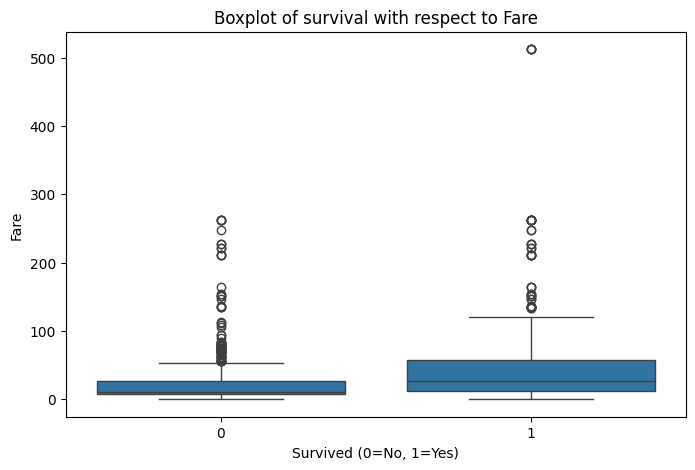


생존자들 요금대가 좀 더 폭 넓게 분포되어 있고, 중앙값도 더 크다.
그래서 배 요금을 비싸게 지불한 사람들 중에 생존자가 더 많을 것이라고
생각해 볼 수 있다.



In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data = fullDt.dropna(subset=['Fare']), x="Survived", y="Fare") # 결측치 있으면 그래프가 안 그려짐!

plt.title('Boxplot of survival with respect to Fare')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()

comment = """
생존자들 요금대가 좀 더 폭 넓게 분포되어 있고, 중앙값도 더 크다.
그래서 배 요금을 비싸게 지불한 사람들 중에 생존자가 더 많을 것이라고
생각해 볼 수 있다.
"""

print(comment)

#### 표 가격 vs 몇 등실인지의 관계
- 가격과 몇 등실인지의 관계를 잠시 확인해 보자
- 확실히 선실 등급이 높을 수록 가격이 비싼 것을 확인할 수 있었음
  - 두 변수 간에는 연관성 높음

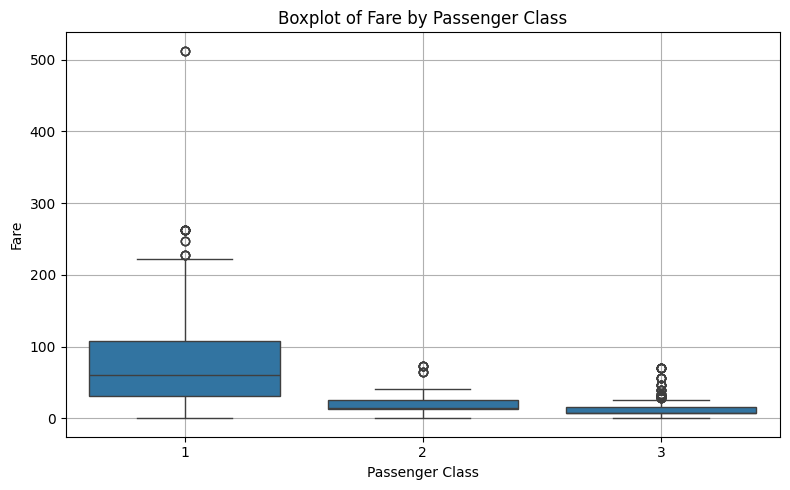

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=fullDt.dropna(subset=['Fare']), x='Pclass', y='Fare')

plt.title('Boxplot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 그러면 생존율을 따져볼까?
- 일단 그러면 등실 별 생존율을 점검해 보자!
  - 1등실, 2등실, 3등실로 갈수록 생존률이 낮아짐!

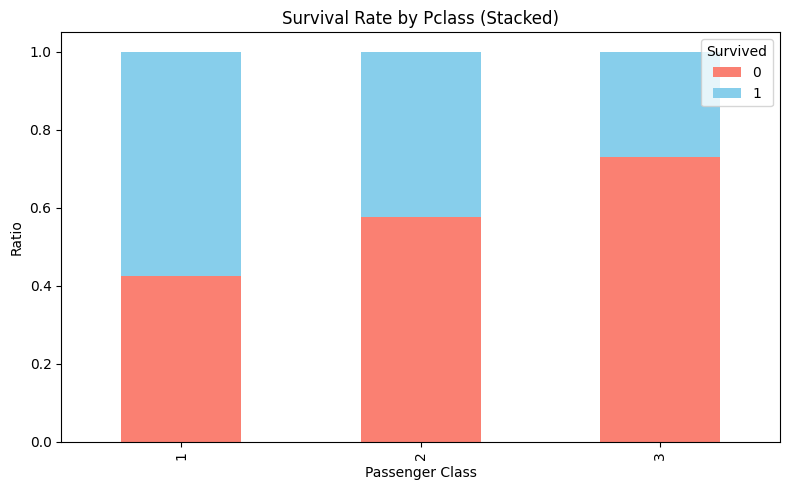

1등실 생존률: 57.59%
2등실 생존률: 42.24%
3등실 생존률: 26.94%


In [98]:
pclass_survived_rate = fullDt.groupby(['Pclass', 'Survived'], observed=True).size().unstack().apply(lambda x: x / x.sum(), axis=1)
# ,observed = True 옵션을 쓰지 않아도 똑같은 그림 나오는데
# 없는 조합이 생길 수 있으므로 (객실/생사여부 조합에 따른) 그에 따른 warning을 없애고자
# observed=True 추가(From ChatGPT)

pclass_survived_rate.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8,5))
plt.title('Survival Rate by Pclass (Stacked)')
plt.ylabel('Ratio')
plt.xlabel('Passenger Class')
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

# 생존률 관점 접근
class1_rate = pclass_survived_rate.loc[1, 1] # 이게 실제 Class기준이라, 우리가 pandas dataframe 다룰 때처럼 0부터 indexing하면 오류가 남!
class2_rate = pclass_survived_rate.loc[2, 1]
class3_rate = pclass_survived_rate.loc[3, 1]

print(f'1등실 생존률: {round(class1_rate*100,2)}%')
print(f'2등실 생존률: {round(class2_rate*100,2)}%')
print(f'3등실 생존률: {round(class3_rate*100,2)}%')

In [112]:
gender_survival_rate = fullDt.groupby(['Sex','Survived'], observed = True).size().unstack().apply(lambda x : x/ x.sum(), axis = 1)
# .size() 는 count 세 주는 명령어
# .unstack은 2차원 형태 표로 묶어준는 형태!

gender_survival_rate

Survived,0,1
Sex,,
female,0.17382,0.82618
male,0.87070,0.12930


In [119]:
female_survival_rate = gender_survival_rate.loc['female', 1]
male_survival_rate = gender_survival_rate.loc['male', 1]

print(f'여성생존률: {round(female_survival_rate*100,2)}%')
print(f'남성생존률: {round(male_survival_rate*100,2)}%')

여성생존률: 82.62%
남성생존률: 12.93%


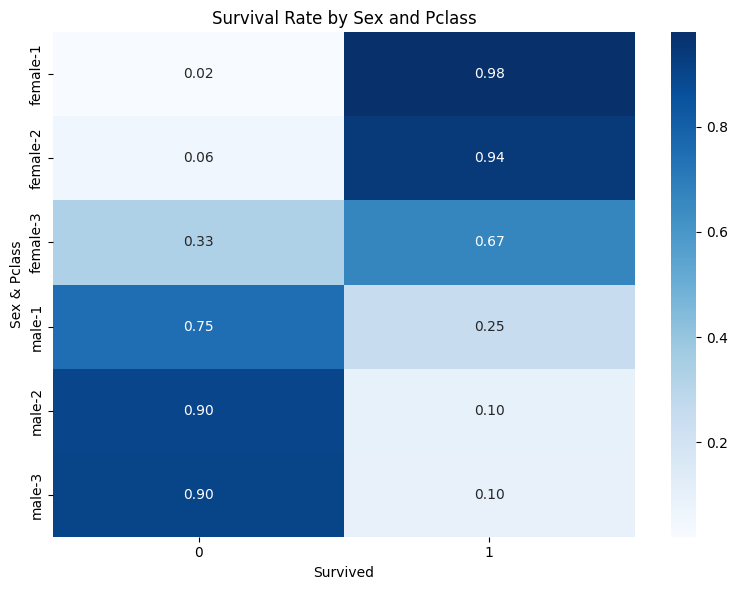

In [123]:
## 객실vs성별

interaction_rate = fullDt.groupby(['Sex', 'Pclass', 'Survived'], observed = True).size().unstack().fillna(0)
interaction_ratio = interaction_rate.apply(lambda x: x / x.sum(), axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(interaction_ratio, annot=True, fmt=".2f", cmap='Blues')
# https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
plt.title('Survival Rate by Sex and Pclass')
plt.xlabel('Survived')
plt.ylabel('Sex & Pclass')
plt.tight_layout()
plt.show()

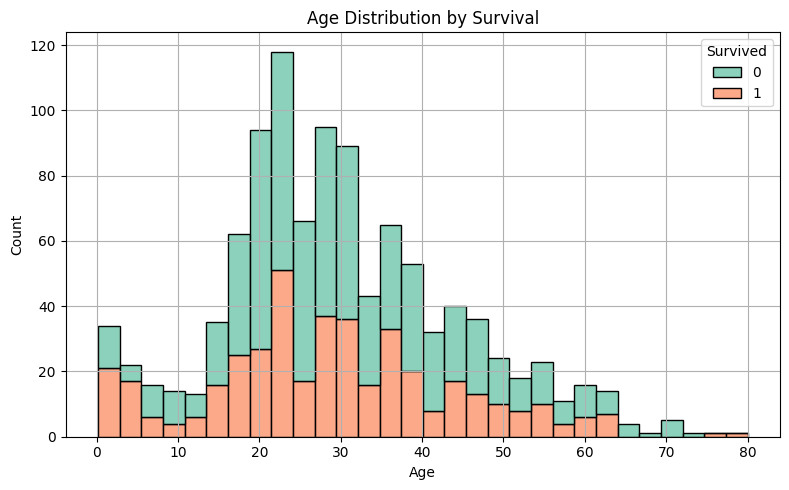

In [134]:
# sns.histplot을 그릴 때..
# age의 경우 NAN값이 많기 때문에 sns.histplot이 안 그려짐
# 그래서 중앙값으로 채워넣거나 하기 전에.. 일단 EDA 단계이므로
# 결측치는 제거하고 그림을 그림

plt.figure(figsize=(8, 5))
sns.histplot(
    data=fullDt.dropna(subset=['Age']),
    x='Age',
    bins=30,
    hue='Survived',
    multiple='stack',
    palette='Set2'
)

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()